## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [172]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [173]:
# Read student data
sdata = pd.read_csv("students-data-1.csv", sep=";")

In [174]:
# Further Exploration using .head()
sdata.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [175]:
#  DataFrame
sdata.shape

(395, 33)

In [176]:
# Columns
sdata.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [177]:
# Type of data is a pandas DataFrame
# Hence I can use pandas DataFrame methods
type(sdata)

pandas.core.frame.DataFrame

In [178]:
# find data type for all variables i dataframe
sdata.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [179]:
# verify null value
sdata.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [180]:
# verify statistics 
sdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [181]:
#Print all the attribute names which are not numerical.
sdata1 = sdata.select_dtypes(exclude='int64')
sdata1.head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [182]:
# column variance of the dataframe
 
sdata.var(axis=0)

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [183]:
# drop whose variance is less than 1
sdata=sdata.drop(['traveltime', 'studytime', 'failures', 'famrel', 'freetime','Dalc'], axis = 1) 
sdata.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [184]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
sdata = sdata.apply(le.fit_transform)
sdata.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,3,7,7


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [185]:
# Convert the continuous values of grades into classes
df=pd.DataFrame(np.where(sdata.loc[:, 'G1':'G3'] >= 10, 1, 0), columns=sdata.loc[:, 'G1':'G3'].columns)
df.head()

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [186]:
# separate features and target into separate dataframes and name them X and y respectively.

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = sdata.drop('G3', axis = 1)
y = sdata['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

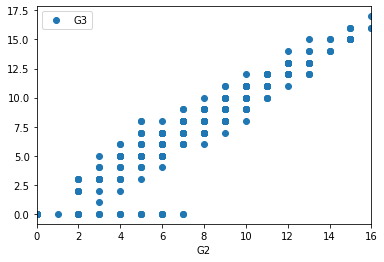

In [188]:
sdata.plot(x='G2', y='G3', style='o');


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.

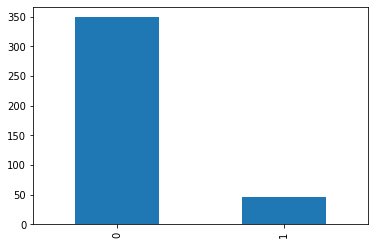

In [189]:
# number of students in each school 
import seaborn as sns
sdata['school'].value_counts().plot(kind='bar');

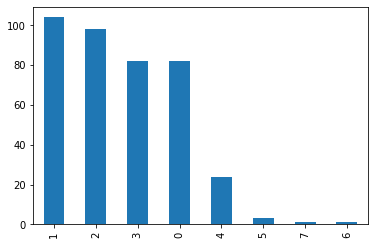

In [190]:
# number of students with different ages
sdata['age'].value_counts().plot(kind='bar');


## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [199]:
# plit the data into training and test sets with training size of 300 records

from sklearn.model_selection import train_test_split

#from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=7)


In [200]:
# Print the number of train and test records
print("train data", X_train.shape)
print("test data", X_test.shape)

train data (300, 26)
test data (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [201]:
# LogisticRegression classifier using fit() and predict() functions in sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)


In [202]:
print("F1 score", f1_score(y_test,test_pred,average='weighted'))
print("Train Accuracy", model.score(X_train, y_train))
print("Test Accuracy",model.score(X_test, y_test))


F1 score 0.21747917774233563
Train Accuracy 0.5766666666666667
Test Accuracy 0.23157894736842105


# Naive bayes with Iris data

### Import Iris.csv

In [256]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [257]:
# Importing the dataset
df = pd.read_csv('iris.csv')

In [258]:
#looking at the first 5 values of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [259]:
# verify type of variables in dataset
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [260]:
# verify null value
df.isnull().any()

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

In [261]:
# replace null value 
df=df.fillna(df.median())

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


In [262]:
# cross verify null value

df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [263]:
#Drop unusable Attributes: ID
#Reason: ID is the unique identifier that directly linked to each instance, which makes it not meaningful for training
df = df.drop(['Id'], axis=1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [266]:
#Spliting the dataset in independent and dependent variables
X=df.drop('Species',axis=1)
y=df['Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Find the distribution of target variable (Class)

In [267]:
#distribution of target variable
df['Species'].value_counts()


Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

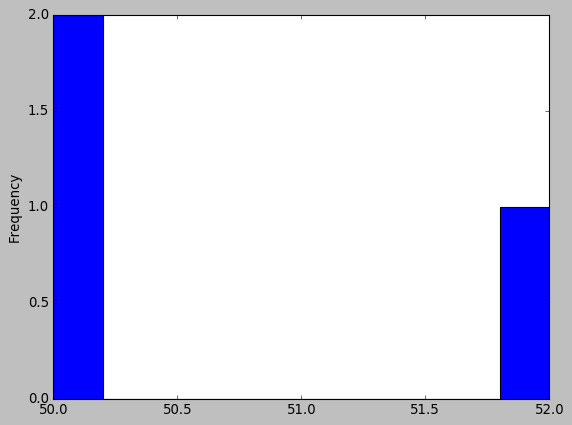

In [270]:
# distribution of target variable using histogram

pd.value_counts(df["Species"]).plot(kind="hist");

 no of records  of Iris-versicolor  and Iris-setosa are same so both are overlapped in above graph

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

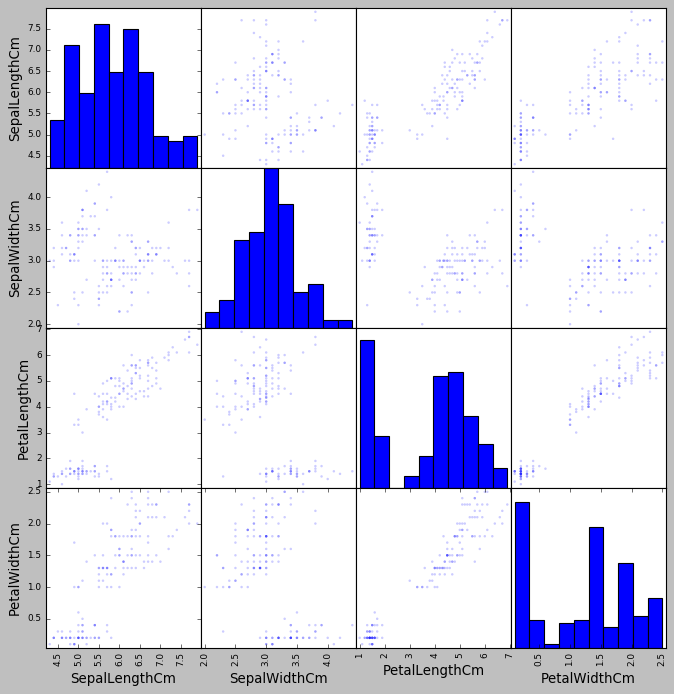

In [271]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(10, 10));

### Summary Statistics and explain insights for at least 2 variables

In [282]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.3,1.30,1.8,2.5


### Correlation among all variables and give your insights

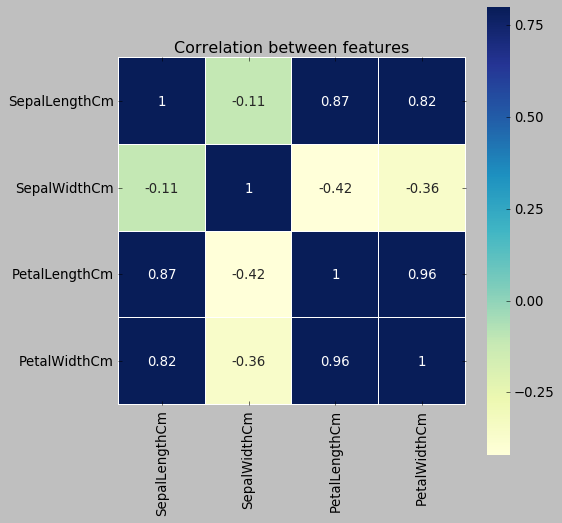

In [293]:
#df.corr()
##https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots

corr=df.corr()
plt.figure(figsize=(7, 7))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Strong corellation can see between Petal Length and Petal Width

### Split data in Training and Validation in 80:20

In [294]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

### Do Feature Scaling

In [295]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [296]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [297]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [298]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [ ]:
print("Train Accuracy", model.score(X_train, y_train))
print("Test Accuracy",model.score(X_test, y_test))

In [299]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [300]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))     

Correct predictions:  31
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0
